<a href="https://colab.research.google.com/github/iclalseymakoca/Insurence_/blob/main/Insurence_Reproduce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

Import libraries


In [3]:
import pandas as pd # Data manipulation
import numpy as np # Linear algebra
import warnings # Ignore warnings
import seaborn as sns #plots
import matplotlib.pyplot as plt # plots
warnings.filterwarnings("ignore")

Load Data

In [4]:
df=pd.read_csv("/content/insurance.csv")

In [5]:

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Visualization


Unique Values

In [6]:
{col:list(df[col].unique()) for col in df.select_dtypes("object")}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

In [7]:
class Pie_plot():

  def __init__(self,serie,title,colors,explode):

    self.serie=serie
    self.title=title
    self.colors=colors
    self.explode=explode

  def pie(self):


    self.serie.plot(kind='pie',title=self.title, figsize=[10,4],
                     colors=self.colors,explode=self.explode,
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*self.serie.sum()))


class Pie_Option(Pie_plot):

  def option_plot(self,option):

    if option== "region":


      super().pie()


    elif option == "smoker":

      super().pie()

      
    elif option == "sex":

      super().pie()
    
    elif option == "children":

      super().pie()
     

In [8]:
region_serie=df.groupby('region').size()
title="Region Percent"
colors=['#77dd77','#fdfd96','#84b6f4','#fdcae1']
explode= [0,0,0.1,0]
     

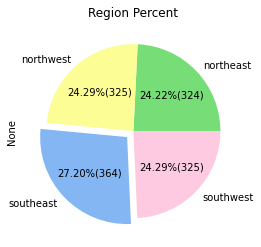

In [9]:

region_pie=Pie_Option(region_serie,title,colors,explode)
region_pie.option_plot("region")

In [10]:
smoker_serie=df.groupby('smoker').size()
title="Smoker Percent"
colors=['#77dd77','#ff6961']
explode=[0.1,0.01]
     

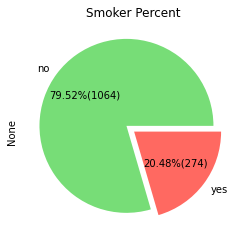

In [11]:

smoker_pie=Pie_Option(smoker_serie,title,colors,explode)
smoker_pie.option_plot("smoker")

In [12]:
sex_serie=df.groupby('sex').size()
title="Sex Percent"
colors=['#FFD1DC','#2271b3']
explode=[0,0]

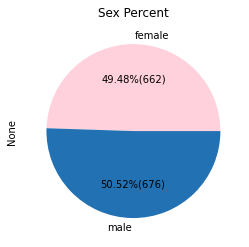

In [13]:

smoker_pie=Pie_Option(sex_serie,title,colors,explode)
smoker_pie.option_plot("sex")

In [14]:

children_serie=df.groupby('children').size()
title='Children Percent'
colors=['#b0f2c2','#fdfd96','#84b6f4','#fdcae1','#b0c2f2','#77dd77']
explode=[0.04,0,0,0,0,0]
     

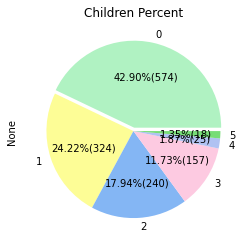

In [15]:
children_pie=Pie_Option(children_serie,title,colors,explode)
children_pie.option_plot("children")

In [16]:
sns.set_style(style="whitegrid")

In [17]:
def histogram(feature,title):


  fig,ax=plt.subplots(1,1,figsize=(5,2))

  ax.set_title(title)
  ax.hist(df[feature],ec="k",color="#FADA5E",lw=3)


  ax.axvline(df[feature].mean(),
           color="red",
           linestyle="--",
           lw=3,label="Mean")


  ax.axvline(df[feature].median(),
           color="blue",
           linestyle="--",
           lw=3,label="Median")

  ax.legend()

  plt.show()
     

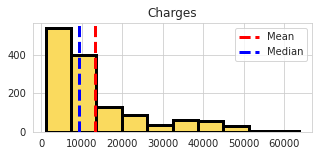

In [18]:
histogram("charges","Charges")

In [19]:

from plotnine import ggplot, aes, geom_point,geom_boxplot,labs,facet_wrap,scale_fill_manual,theme
     

The price of insurance is higher for people who smoke?

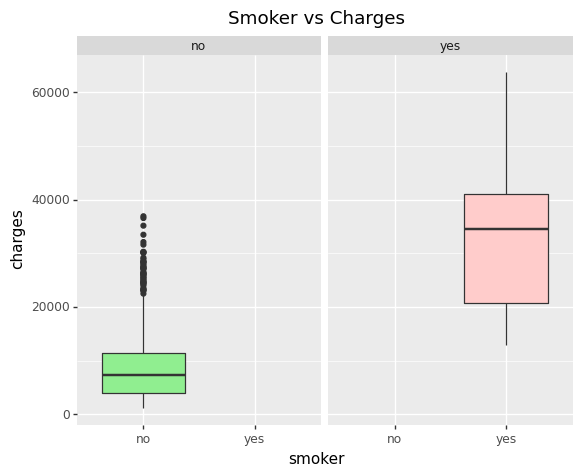

<ggplot: (8786429591845)>

In [20]:
(
    
    ggplot(df)  
    + aes(x="smoker",y="charges",fill="smoker")  
    + geom_boxplot() + labs(title="Smoker vs Charges") 
    + facet_wrap("smoker")
    + theme(legend_position="none")
    +  scale_fill_manual(values=["#90ee90","#ffcccb"])
    
  

)


We observe a strong presence of outliers, for the category of non-smokers.

In [21]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

The average price of smokers is considerably much higher than non-smokers. Since smokers generally have a worse state of health and as a consequence the medical charge will be higher.

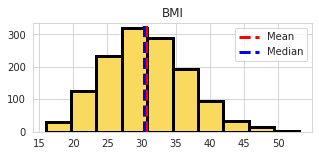

In [22]:
histogram("bmi","BMI")
     

Most of the BMI data is within a normal distribution. But even so, it is possible to appreciate outlier values ​​in the upper range.

In [23]:
from plotnine.facets import facet_grid

from plotnine.geoms import geom_smooth

def scatter_plots(feature,title):

  return((ggplot(df)  
    + aes(x=feature,y="charges",fill="smoker",alpha=0.1)  
    + geom_point() + labs(title=title,x=feature) 
    + facet_wrap("smoker")
    + theme(legend_position="none")
    +  scale_fill_manual(values=["#90ee90","#ffcccb"])
    + geom_smooth(method="lm")))
  

People with a high BMI the insurance charge is higher?

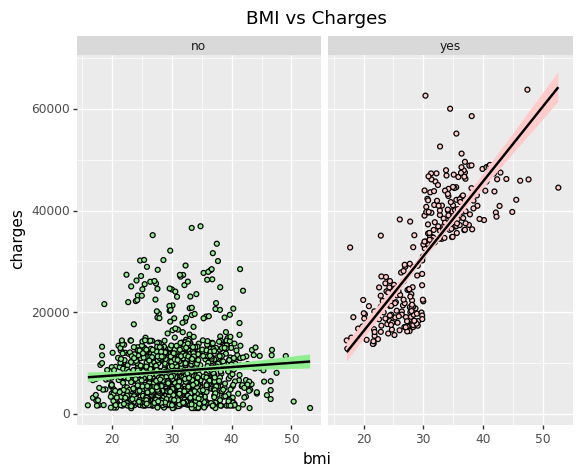

<ggplot: (8786429470913)>

In [24]:
scatter_plots("bmi","BMI vs Charges")

For non-smokers, the data trend remains constant.
While for smokers the trend line is linear,
that is, one value increases proportionally with another.

Does age influence the price of insurance?

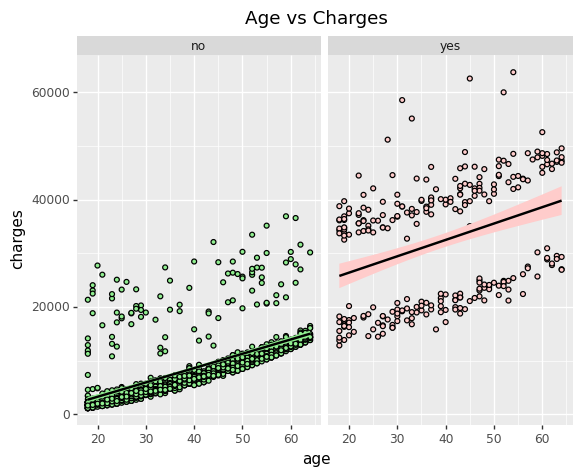

<ggplot: (8786427790068)>

In [25]:

scatter_plots("age","Age vs Charges")

We observe 4 "clusters":

The first is for healthy people who do not smoke are healthy, as a consequence they do not have severe medical problems.

People who do not smoke but have significant health problems.

People who smoke but have a good health condition.

Users who smoke and have serious medical problems.

It can be simplified under two conditions. The first where the condition is not so serious and the second is when the case is dedicated.

We could create an additional feature, to be able to classify users based on the degree of health of the user. Since, as we can see in the graph, the quality of health influences the medical position.

In [26]:
corr_pearson=df.corr(method="pearson")
corr_spearman=df.corr(method="spearman")

def correlation_matrix(corr_matrix):

  plt.figure(figsize=(6, 2))
  sns.heatmap(corr_matrix,annot=True)

  plt.show()

Correlation Matrix


It is used to establish possible relationships between variables

Pearson

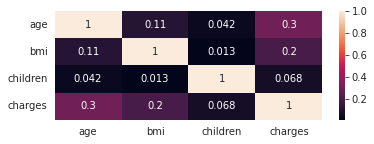

In [27]:

correlation_matrix(corr_pearson)

Spearman

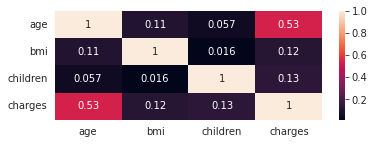

In [28]:

correlation_matrix(corr_spearman)
     

The correlation is measured from 0 to 1 if it is positive. There does not appear to be a strong relationship between the variable of interest. It is still too early to start ruling out variables, since these variables can complement the predictions.

Conclusion


The variables that refer to describe some habits and characteristics of users influence the insurance charge.

We discovered a new hidden characteristic in the dataset when comparing age with the price of insurance based on whether the user smokes or not, we could add another new variable to the problem that refers to the degree of the health problem.

# **Feature Engineering**

Import libraries

In [29]:
import pandas as pd # data manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
import warnings # Ignore warning messages

In [30]:
warnings.filterwarnings("ignore")

Load Data

In [31]:
df=pd.read_csv("/content/insurance.csv")

Using the histogram and the box plot. We confirm the presence of outliers. So we have to give it special processing.

Technically we can give outliers the same treatment as missing values.

Delete those values.

Replace them with a statistical measure or by any other value that is in a suitable range.

Add new variables, as we mentioned in the EDA.

Feature engineering

In [32]:
class Intervals():
    
    def __init__(self,feature):
        
        
        self.mean=feature.mean()
        self.sd=feature.std()
        self.interval_range=[1.5,2,2.5,3.0,3.5,4]
        
    def Upper_Interval(self):
        
        for interval in self.interval_range:
            
            upper_interval= self.mean+interval*self.sd
            upper_interval=round(upper_interval,2)
            
            print(f"Interval range {interval}: {upper_interval}")
        
    def Lower_Interval(self):
        
         for interval in self.interval_range:
            
            lower_interval=self.mean-interval*self.sd
            lower_interval=round(lower_interval,2)
            
            print(f"Interval range {interval}: {lower_interval}")
        

We create a class called intervals that have functions that will allow us to make it easier to find the best ideal interval.

In [33]:
class Best_Interval(Intervals):
    
    def __init__(self,feature):
        Intervals.__init__(self,feature)
    
    def Upper_Interval_Ideal(self):
        
        return super().Upper_Interval()
    
    def Lower_Interval_Ideal(self):
        
        return super().Lower_Interval()

We apply a technique in OOP(Object-oriented programming) to make the code easier to understand. We apply inheritance so that the parent class (Intervals) passes attributes and functions to the child class (Best_Intervals).

Selected from the best interval

In [34]:
bmi_interval_ideal=Best_Interval(df["bmi"])

Upper limit BMI

In [35]:
bmi_interval_ideal.Upper_Interval_Ideal()

Interval range 1.5: 39.81
Interval range 2: 42.86
Interval range 2.5: 45.91
Interval range 3.0: 48.96
Interval range 3.5: 52.01
Interval range 4: 55.06


With an interval of 3 it gives a good value. To be able to replace outliers.

Replaces values greater than the upper range

In [36]:
df["bmi"]=np.where(df["bmi"]>48.95,48.95,df["bmi"])

Lower limit BMI

In [37]:
bmi_interval_ideal.Lower_Interval_Ideal()

Interval range 1.5: 21.52
Interval range 2: 18.47
Interval range 2.5: 15.42
Interval range 3.0: 12.37
Interval range 3.5: 9.32
Interval range 4: 6.27


The appropriate interval value is 2. Since considered with the minimum BMI values ​​regardless of sex is 18.

Replaces values greater than the lower range

In [38]:
df["bmi"]=np.where(df["bmi"]<18,18,df["bmi"])

In [39]:
sns.set_style(style="whitegrid")

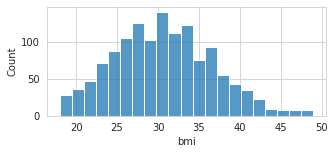

In [40]:
plt.subplots(1,1,figsize=(5,2))
sns.histplot(data=df,x="bmi")
plt.show()

Separate into smokers and non-smokers

In [41]:
smoker_no_split=df.query("smoker=='no'")
smoker_yes_split=df.query("smoker=='yes'")

In order to give a better treatment to the data.

Smoker no split


Upper limit Charges

In [42]:
charges_interval_ideal=Best_Interval(smoker_no_split["charges"])
charges_interval_ideal.Upper_Interval_Ideal()

Interval range 1.5: 17424.94
Interval range 2: 20421.83
Interval range 2.5: 23418.72
Interval range 3.0: 26415.61
Interval range 3.5: 29412.5
Interval range 4: 32409.4


In [43]:
def scatter_plot_age_charges(dataset):
    
    plt.subplots(1,1,figsize=(10,2))
    sns.scatterplot(data=dataset,x="age",y="charges")
    plt.show()
    

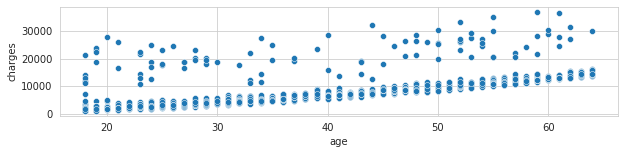

In [44]:
scatter_plot_age_charges(dataset=smoker_no_split)

Using an interval of 1.5 gives good results. We will use the upper interval to group the degree of medical problem if it is severe or not.

Group according to degree of medical problem

In [45]:
smoker_no_split["medical_problem"]=smoker_no_split["charges"].apply(lambda x: "severe" if x>17000 else "light")

For those values greater than $17,000 US, it will classify them as severe medical problems.

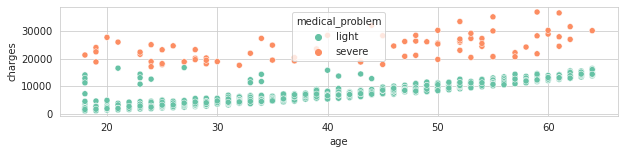

In [46]:
plt.subplots(1,1,figsize=(10,2))
sns.scatterplot(data=smoker_no_split,x="age",y="charges",hue="medical_problem",palette="Set2")
plt.show()

Smoker yes split

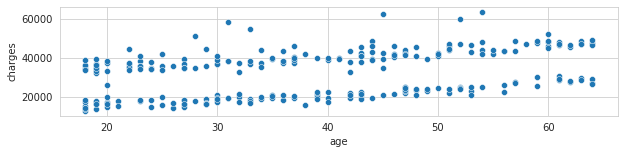

In [47]:
scatter_plot_age_charges(dataset=smoker_yes_split)

From a range higher than $32,000 USD we could create a new group, in a similar way to non-smokers but with a different range

In [48]:
smoker_yes_split["medical_problem"]=smoker_yes_split["charges"].apply(lambda x: "severe" if x > 32000 else "light")


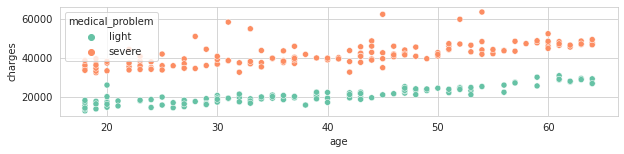

In [49]:
plt.subplots(1,1,figsize=(10,2))
sns.scatterplot(data=smoker_yes_split,x="age",y="charges",hue="medical_problem",palette="Set2")
plt.show()

Replace Outliers Values

In [50]:
smoker_yes_split["charges"]=smoker_yes_split["charges"].apply(lambda x: 48000 if x > 48000 else x)

We replace values greater than $48,000 and substitute them with that amount, since it is the closest value to the outliers.

We create a new dataframe with the clean data

In [51]:
df_clear=pd.concat([smoker_no_split,smoker_yes_split])



In [52]:
def boxplot():
    

    fig,(ax_box_1,ax_box_2)=plt.subplots(1,2,figsize=(10,4))
    
    ax_box_1.set_title("Adding new feature")

    sns.boxplot(data=df_clear,x="smoker",
            y="charges",
            hue="medical_problem",
            palette="Set2",
            ax=ax_box_1)

    ax_box_2.set_title("Without the new feature")
    sns.boxplot(data=df,
            x="smoker",
            y="charges",
            palette="Set2",
            ax=ax_box_2)
    plt.show()

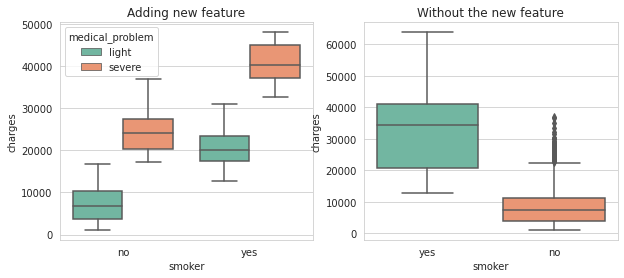

In [53]:
boxplot()

With the new variable we created, we solve the problem of outliers. Thanks to this variable, values that are out of the normal range can be better explained.

# **Selection of Model Ideal**

Load Libraries

In [54]:
import warnings # ignore warnings
import pandas as pd # data manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plots
import seaborn as sns # plots
warnings.filterwarnings("ignore")     

Load Datset

In [55]:
df=pd.read_csv("/content/insurence_clearv2.csv")
    
df.head()

,age,sex,bmi,children,smoker,region,charges,medical_problem
0,18,male,33.770,1,no,southeast,1725.55230,light
1,28,male,33.000,3,no,southeast,4449.46200,light
2,33,male,22.705,0,no,northwest,21984.47061,severe
3,32,male,28.880,0,no,northwest,3866.85520,light
4,31,female,25.740,0,no,southeast,3756.62160,light


In [56]:
def dataset():
    return df.drop(["charges"],axis="columns"),df.charges.values

X,y=dataset()

Split data

In [57]:

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,
                                               y,
                                               test_size=0.33,
                                               random_state=42)
     

Data preprocessing


MinMaxScaler It consists of adjusting the data on a scale from 0 to 1. With the aim that the variables are comparable to each other.

OneHotEncoding It is used for qualitative variables. For example the geographical location or the color of a car.

It consists of creating several fictitious variables according to the number of categorical variables. Where a 1 is indicated if said observation belongs to the class. It's a similar thing with truth tables if you're familiar with programming.

In [58]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

Data transform

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline   

In [60]:
tf_colummns=make_column_transformer((MinMaxScaler(),["age","bmi","children"]), 
                                   (OneHotEncoder(drop="if_binary"),["region","sex",
                                                                     "smoker","medical_problem"])) 
    

Selection of Best Model

There are 3 possible states where machine learning models fall.

Underfitting: It is due to the lack of variables; therefore, it does not perform well with training and validation data.Due to the lack of variables to consider.

Perfect Fit: The model yielded excellent results for both the training and validation data.

Overfitting: Occurs due to outliers and an excessive number of variables. where the model performs well for the training data. But it is unable to adapt to data that it has never seen.

Linear Regression

A simple linear regression consists of finding the best straight line that fits the set of data.

Its mathematical formula is the following: 

y  the variable to predict

 m represents the variable

 x the weight of the coefficient

b  the intercept

But in this case we will use a multiple linear regression model, where the best hyperplane that fits the data will be found. Because we are dealing with 2 or more predictor variables.

The formula is very similar to the simple one with the difference that more coefficients are added accordingly to the number of variables.

It has the advantage that it is easy to interpret. It has the disadvantage of requiring a scale adjustment so that the variables can be compared with each other.

In [61]:

from sklearn.linear_model import LinearRegression
     

def pipeline_model(model):

    return Pipeline([("transform",tf_colummns),("model",model)])
     

lm_pipeline=pipeline_model(LinearRegression())
     

lm_pipeline.fit(X_train,Y_train) # train mode

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['region', 'sex', 'smoker',
                                                   'medical_problem'])])),
                ('model', LinearRegression())])

In [62]:
lm_pipeline.score(X_train,Y_train) # evaluate with training data

0.9715506918648594

In [63]:
lm_pipeline.score(X_test,Y_test)   # evaluate with test data

0.9739751283700955

Ideal Selection of Numbers of Estimators

We will use the MSE (mean square error) as a metric, which measures the average error between the value predicted by the model and the original value. It is very sensitive to outliers, which gives us a more realistic view of the error between predictions. Also, in the Characteristics Engineering section, I was in charge of treating outliers, which is why I consider it to be a good metric.

We will use this metric to select the ideal range of number of estimators for the GradientBoosting and XGBoost algorithms.

We select the ideal range of estimators that does not show symptoms of overfitting, where it reaches a point where the model only improves on the training data. While for the test ones there is no significant improvement, for which there is no reason to use more estimators, if there is no longer a significant improvement.

In [64]:
from sklearn.metrics import mean_squared_error

Assembler Algorithms

They are trees that use weak algorithms, usually decision trees. For GradientBoosting and XGBOOST, each estimator becomes stronger, according to the learning rate provided by the user. Where the predictions are established, to the total average of estimators.

They have the advantage that they do not require preprocessing of variables, in this case we will do it to use the same scale as Linear Regression.

Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
     

def evaluate(max_depth,lr):
    
    estimator_list=[]
    mse_train_list=[]
    mse_test_list=[]

    estimators=np.arange(100,1000,step=2)
    for estimator in estimators:
      
        model=GradientBoostingRegressor(max_depth=max_depth,n_estimators=estimator,learning_rate=lr,random_state=42)
        model=pipeline_model(model)
        model.fit(X_train,Y_train)
        pred_train=model.predict(X_train)
        pred_test=model.predict(X_test)
        
        mse_train=mean_squared_error(Y_train,pred_train)
        mse_test=mean_squared_error(Y_test,pred_test)
        
        estimator_list.append(estimator)
        mse_test_list.append(mse_test)
        mse_train_list.append(mse_train)

        
    return estimator_list,mse_test_list,mse_train_list
     

In [66]:

def dataframe_evaluate_trees(max_depth,lr):
  
    n_trees,mse_test,mse_train=evaluate(max_depth=max_depth,lr=lr)

    df_evaluate=pd.DataFrame({"n_trees": n_trees,"mse_test":mse_test,"mse_train":mse_train}) 
  
    return df_evaluate
     

first_evaluete_gbr=dataframe_evaluate_trees(max_depth=3,lr=0.01)
     

second_evaluete_gbr=dataframe_evaluate_trees(max_depth=4,lr=0.01)
     

Ideal number of estimators

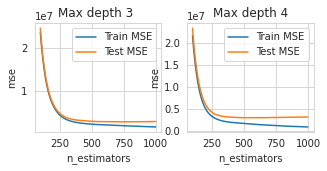

In [67]:
def estimators_plot(df_evaluate_1,df_evaluate_2):

  fig,(ax,ax_1)=plt.subplots(1,2,figsize=(5,2))

  ax.set_title("Max depth 3 ")
  ax.plot(df_evaluate_1["n_trees"],df_evaluate_1["mse_train"],label="Train MSE")
  ax.plot(df_evaluate_1["n_trees"],df_evaluate_1["mse_test"],label="Test MSE")
  ax.set_xlabel("n_estimators")
  ax.set_ylabel("mse")

  ax.legend()
    
  ax_1.set_title("Max depth 4")
  ax_1.plot(df_evaluate_2["n_trees"],df_evaluate_2["mse_train"],label="Train MSE")
  ax_1.plot(df_evaluate_2["n_trees"],df_evaluate_2["mse_test"],label="Test MSE")
  ax_1.set_xlabel("n_estimators")
  ax_1.set_ylabel("mse")

  ax_1.legend()
    
  plt.show()
     

sns.set_style(style="whitegrid")
     

estimators_plot(first_evaluete_gbr,second_evaluete_gbr)
     

With a maximum depth of 3 there are fewer symptoms of overfitting, that is, the model is only good for training data, while for test data it does not perform well.

A good range of estimators to select is between 320 and 360, since from this amount the MSE does not drastically decrease for the test data, while for the training data it does decrease, which can cause an overfitting.

In [68]:
first_evaluete_gbr.query("n_trees>=330 and n_trees<=360")
  

,n_trees,mse_test,mse_train
115,330,3.710098e+06,3.227366e+06
116,332,3.692500e+06,3.208361e+06
117,334,3.676926e+06,3.190123e+06
118,336,3.660602e+06,3.171630e+06
119,338,3.644864e+06,3.154494e+06
120,340,3.630640e+06,3.137665e+06
121,342,3.616476e+06,3.120526e+06
122,344,3.602911e+06,3.104378e+06
123,346,3.590603e+06,3.088128e+06
124,348,3.576738e+06,3.071852e+06


Starting from the estimator number 356 there is no longer an improvement for the test data.

In [69]:
gbr=GradientBoostingRegressor(max_depth=3,
                          learning_rate=0.01,
                          n_estimators=356,
                          random_state=42)
   

In [70]:
gbr_pipeline=pipeline_model(gbr)

In [71]:

gbr_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['region', 'sex', 'smoker',
                                                   'medical_problem'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, n_estimators=356,
                                           random_state=42))])

In [72]:
gbr_pipeline.score(X_train,Y_train) # evaluate with training data
   

0.9784300549237774

In [73]:
gbr_pipeline.score(X_test,Y_test) # evaluate with test data
     

0.9759846871453317

XGBOOST


It has the advantage of using GPUs for training, so it creates training faster than other algorithms.

In [74]:

from xgboost import XGBRegressor

Selection number of estimators XGBOOST

In [75]:

def evaluate(max_depth,lr):
    
    estimator_list=[]
    mse_train_list=[]
    mse_test_list=[]
    
    estimators=np.arange(100,1000,step=2)
    for estimator in estimators:
      
        model=XGBRegressor(max_depth=max_depth,n_estimators=estimator,learning_rate=lr,random_state=42,verbosity=0)
        model=pipeline_model(model)
        model.fit(X_train,Y_train)
        pred_train=model.predict(X_train)
        pred_test=model.predict(X_test)
        
        mse_train=mean_squared_error(Y_train,pred_train)
        mse_test=mean_squared_error(Y_test,pred_test)
        
        estimator_list.append(estimator)
        mse_test_list.append(mse_test)
        mse_train_list.append(mse_train)

        
    return estimator_list,mse_test_list,mse_train_list
    

In [76]:
first_evaluete_xgb=dataframe_evaluate_trees(max_depth=3,lr=0.01)
 

In [77]:
second_evaluete_xgb=dataframe_evaluate_trees(max_depth=4,lr=0.01)
   

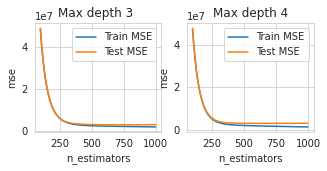

In [78]:

estimators_plot(first_evaluete_xgb,second_evaluete_xgb)
  

Again with a maximum depth of 3 it will generate better results. The ideal number of trees is between 580 and 600.Since starting from this quantity there is no significant improvement for the test data. We can allow ourselves the opportunity to use more estimators and not appreciate the curve of the overfitting graph. Something that generates a lower MSE since more decision trees were used.

In [79]:

first_evaluete_xgb.query("n_trees>=580 and n_trees<=600")
     


,n_trees,mse_test,mse_train
240,580,3.010465e+06,2.374972e+06
241,582,3.008327e+06,2.370695e+06
242,584,3.006988e+06,2.368437e+06
243,586,3.005550e+06,2.365191e+06
244,588,3.004151e+06,2.362489e+06
245,590,3.003320e+06,2.359925e+06
246,592,3.002089e+06,2.357800e+06
247,594,3.000733e+06,2.355108e+06
248,596,2.999866e+06,2.351711e+06
249,598,2.999690e+06,2.349483e+06


We use a quantity of 596, since starting from this quantity there is no significant improvement. That justifies the use of more estimators.

In [80]:

xgb_reg=XGBRegressor(max_depth=3,
                     learning_rate=0.01,
                     n_estimators=596,
                     verbosity=0,
                     random_state=42)

xgb_pipeline=pipeline_model(xgb_reg)
 

In [81]:

xgb_pipeline.fit(X_train,Y_train) # train model
 

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['region', 'sex', 'smoker',
                                                   'medical_problem'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, ea...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=596,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

In [82]:

xgb_pipeline.score(X_train,Y_train) # evaluation with train data
 

0.9831619348017795

In [83]:

xgb_pipeline.score(X_test,Y_test) # evaluation with test data
 

0.9795791427981901

In [84]:

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
  

In [85]:

class Evaluete():

  def __init__(self,model,X_data,y_true):

    self.X_data=X_data
    self.y_true=y_true

    self.model=model
    self.predict=self.model.predict(self.X_data)


  def mse(self):

    return mean_squared_error(self.y_true,self.predict)

  def r2(self):

    return r2_score(self.y_true,self.predict)

  def cv_score(self):
    
    return cross_val_score(self.model,self.X_data,self.y_true,cv=10).mean()
  

In [86]:

metrics_lm_train=Evaluete(lm_pipeline,X_train,Y_train)
metrics_gbr_train=Evaluete(gbr_pipeline,X_train,Y_train)
metrics_xgb_train=Evaluete(xgb_pipeline,X_train,Y_train)
 

In [87]:

metrics_lm_test=Evaluete(lm_pipeline,X_test,Y_test)
metrics_gbr_test=Evaluete(gbr_pipeline,X_test,Y_test)
metrics_xgb_test=Evaluete(xgb_pipeline,X_test,Y_test)
 

MSE


Measures the average error between the original and predicted values.

In [88]:

mse_lm_train=metrics_lm_train.mse()
mse_lm_test=metrics_lm_test.mse()

mse_gbr_train=metrics_gbr_train.mse()
mse_gbr_test=metrics_gbr_test.mse()

mse_xgb_train=metrics_xgb_train.mse()
mse_xgb_test=metrics_xgb_test.mse()


It measures the degree of fit between the original value and the predictions. The closer it is to 1, the closer the original and predicted values ​​will be.

In [89]:

r2_lm_train=metrics_lm_train.r2()
r2_lm_test=metrics_lm_test.r2()

r2_gbr_train=metrics_gbr_train.r2()
r2_gbr_test=metrics_gbr_test.r2()

r2_xgb_train=metrics_xgb_train.r2()
r2_xgb_test=metrics_xgb_test.r2()



Cross Validation


It measures the degree of generalization of the model. It divides the data into several subsets by the amount said by the user. To subsequently obtain the average value of generalization.

In [90]:

cv_lm_test=metrics_lm_test.cv_score()

cv_gbr_test=metrics_gbr_test.cv_score()

cv_xgb_test=metrics_xgb_test.cv_score()
  

Dataframe evaluation

In [91]:

models_names=["Linear Regression","Gradient Boosting","XGBOOST"]

mse_train=[mse_lm_train,mse_gbr_train,mse_xgb_train]
mse_test=[mse_lm_test,mse_gbr_test,mse_xgb_test]

r2_train=[r2_lm_train,r2_gbr_train,r2_xgb_train]
r2_test=[r2_lm_test,r2_gbr_test,r2_xgb_test]

cv=[cv_lm_test,cv_gbr_test,cv_xgb_test]

evaluate_df=pd.DataFrame({"Model":models_names,
                          "MSE train":mse_train,
                          "MSE test":mse_test,
                          "R2 train":r2_train,
                          "R2 test":r2_test,
                          "CV":cv})
  

In [92]:
evaluate_df

,Model,MSE train,MSE test,R2 train,R2 test,CV
0,Linear Regression,3.973411e+06,3.823107e+06,0.971551,0.973975,0.967011
1,Gradient Boosting,3.012596e+06,3.527899e+06,0.978430,0.975985,0.972753
2,XGBOOST,2.351711e+06,2.999866e+06,0.983162,0.979579,0.974445


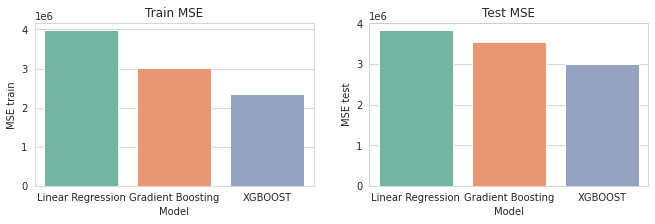

In [93]:

fig,(ax_bar_1,ax_bar_2)=plt.subplots(1,2,figsize=(11,3))

ax_bar_1.set_title("Train MSE")
sns.barplot(data=evaluate_df,x="Model",y="MSE train",palette="Set2",ax=ax_bar_1)

ax_bar_2.set_title("Test MSE")
sns.barplot(data=evaluate_df,x="Model",y="MSE test",palette="Set2",ax=ax_bar_2)


plt.show()
     

The XGBOOST has a better RMSE for training and validation data than its competitors.

In [94]:

pred_lm=lm_pipeline.predict(X_test)
pred_gbr=gbr_pipeline.predict(X_test)
pred_xgb=xgb_pipeline.predict(X_test)
 

In [95]:


df_test=pd.DataFrame({"true_values":Y_test,
                        "pred_lm":pred_lm,
                      "pred_gbr":pred_gbr,
                      "pred_xgb":pred_xgb,
                      "smoker":X_test["smoker"]
                     })
     


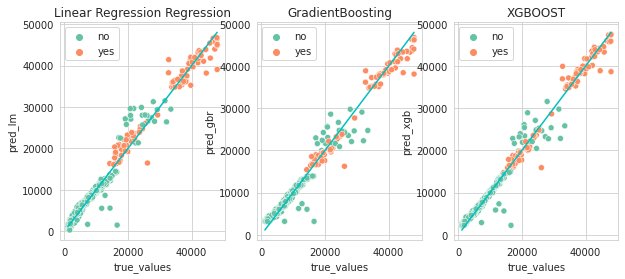

In [96]:

fig,(ax_0,ax_1,ax_2)=plt.subplots(1,3,figsize=(10,4))
sns.set_style(style="whitegrid")

ax_0.set_title("Linear Regression Regression")
sns.scatterplot(data=df_test,x="true_values",y="pred_lm",color="red",hue="smoker",ax=ax_0,palette="Set2")
sns.lineplot(data=df_test,x="true_values",y="true_values",color="c",ax=ax_0)


ax_1.set_title("GradientBoosting")
sns.scatterplot(data=df_test,x="true_values",y="pred_gbr",color="red",hue="smoker",ax=ax_1,palette="Set2")
sns.lineplot(data=df_test,x="true_values",y="true_values",color="c",ax=ax_1)

ax_2.set_title("XGBOOST")
sns.scatterplot(data=df_test,x="true_values",y="pred_xgb",color="red",hue="smoker",ax=ax_2,palette="Set2")
sns.lineplot(data=df_test,x="true_values",y="true_values",color="c",ax=ax_2)

plt.show()
   

Conclusion

All 3 algorithms give excellent results. Any of them can perfectly solve the problem.

XGBOOST Offers better metrics for test and training data.It also has the advantage that it does not require scaling for continuous variables, since it works based on mathematical inequalities. We can use the original data without any problem.

# **Definitive Model**

In [121]:
!pip install tensorflow
!pip install shap
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
import pandas as pd # Data Manupulation
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots
import warnings # Ignore Warnings
import shap # Feature importances
warnings.filterwarnings("ignore") # Ignore Warnings

In [123]:
df=pd.read_csv("/content/insurence_clearv2.csv")

Split Inputs and Outputs

In [124]:
def load_inputs_outputs():
    
    return df.drop(["charges"],axis="columns"),df.charges.values

X,y=load_inputs_outputs()

Split data

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,
                                               test_size=0.33, # 33% for testing
                                               random_state=42)
X_train.shape[0],X_test.shape[0]

(896, 442)

Data preprocessing


Note Decision trees do not require normalization of their inputs; and since XGBoost is essentially an ensemble algorithm comprised of decision trees, it does not require normalization for the inputs either.

We will only perform One Hot Encoding transformation for categorical variable.

It is used for qualitative categorical variables, for example in the image the color variable. Where dummy variables are created according to the number of categories of the variables, a 1 is assigned where it complies with the condition and the others are filled with 0.

Instead of just replacing the labels with random numbers it can affect the performance of the model, for this type of variables. Since we would be giving more weight to the categories that have the highest value. In addition, the One Hot Encoding transformation has the advantage at the geometric level, since there is already the same distance between the categories.

In [126]:
class Preprocessing_OHE():
    
    def __init__(self,X_data):
        self.X_data=X_data
    
    
    def binary(self):
        
        self.X_data["sex"]=self.X_data["sex"].apply(lambda x: 1 if x == "male"  else 0)
        self.X_data["smoker"]=self.X_data["smoker"].apply(lambda x: 1 if x == "yes"  else 0)
        self.X_data["medical_problem"]=self.X_data["medical_problem"].apply(lambda x: 1 if x == "severe"  else 0)
        
        return self.X_data
    
    def multinomial(self):
        
        return pd.get_dummies(self.X_data,columns=["region"])


Preprocessing Training Data

In [127]:
X_train_preprocesing=Preprocessing_OHE(X_train)
X_train_ohe=X_train_preprocesing.binary()
X_train_ohe=X_train_preprocesing.multinomial()
X_train_ohe.head()


,age,sex,bmi,children,smoker,medical_problem,region_northeast,region_northwest,region_southeast,region_southwest
1046,18,1,48.950,0,0,0,0,0,1,0
682,55,1,32.775,0,0,0,0,1,0,0
1037,19,0,25.745,1,0,0,0,1,0,0
490,38,0,34.800,2,0,0,0,0,0,1
39,18,0,35.625,0,0,0,1,0,0,0


Preprocessing Testing Data

In [128]:
X_test_preprocesing=Preprocessing_OHE(X_test)
X_test_ohe=X_test_preprocesing.binary()
X_test_ohe=X_test_preprocesing.multinomial()
X_test_ohe.head()

,age,sex,bmi,children,smoker,medical_problem,region_northeast,region_northwest,region_southeast,region_southwest
764,57,1,18.335,0,0,0,1,0,0,0
887,45,1,20.350,3,0,0,0,0,1,0
890,23,1,24.510,0,0,0,1,0,0,0
1293,19,0,32.490,0,1,1,0,1,0,0
259,24,0,27.600,0,0,1,0,0,0,1


XGBOOST

It is part of the assembly algorithms. Which is a type of algorithms that uses weaker models, generally decision trees. The functioning of this model can be summed up with the following phrase: "Unity is strength".

Unlike its brother the random forest which is another ensemble algorithm, it will improve each estimator in such a way that each estimator becomes better than the previous one according to the learning rate.

For this particular problem, which is regression, that is, to predict values with a decimal, each estimator performs the prediction to subsequently obtain the average prediction for each estimator.

In [129]:
from xgboost import XGBRegressor

Explanation parameters


max_depth: Maximum depth of each decision tree.

n_estimators: Number of estimators,that is base algorithms.

learning_rate: Room for improvement for each decision tree, this parameter goes from 0 to 1.

random_state: For example, if I want to run this algorithm again, it will give me a different result, due to the random state

Creation of Model

In [130]:
xgb_reg=XGBRegressor(max_depth=3,
                     learning_rate=0.01,
                     n_estimators=596,
                     random_state=42)

We assign the same parameters that we use to choose the ideal model.

Train Model

In [131]:
xgb_reg.fit(X_train_ohe,Y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=596, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Model Evaluation

In [132]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error



Mean Square Error

It is the average error between the value predicted by the model with respect to the model.

Cross Validation

It consists of subsampling the data according to the number requested by the user. In order to obtain an average of generalization of the data.

In [133]:
class Evaluete():
    
    def __init__(self,X_data,y_true):
            

        self.X_data=X_data
        self.y_true=y_true

        self.model=xgb_reg
        self.predict=self.model.predict(self.X_data)
    
    def mse(self):
        
        return mean_squared_error(self.y_true,self.predict).flatten()

    def r2(self):
        
        return r2_score(self.y_true,self.predict).flatten()

    def cv_score(self):
        
        return cross_val_score(self.model,self.X_data,self.y_true,cv=10).mean().flatten()


Train Evaluation

In [134]:
train_eval=Evaluete(X_train_ohe,Y_train)
mse_train=train_eval.mse()
r2_train=train_eval.r2()
cv_train=train_eval.cv_score()

Test Evaluation

In [135]:
test_eval=Evaluete(X_test_ohe,Y_test)
mse_test=test_eval.mse()
r2_test=test_eval.r2()
cv_test=test_eval.cv_score()

Evaluation Dataframe

In [136]:
features_df={"mse_train":mse_train,
         "mse_test":mse_test,
         "r2_train":r2_train,
         "r2_test":r2_test,
         "cv_train":cv_train,
         "cv_test":cv_test}
df_evaluate=pd.DataFrame(features_df)

In [137]:
df_evaluate

,mse_train,mse_test,r2_train,r2_test,cv_train,cv_test
0,2.351711e+06,3.023848e+06,0.983162,0.979416,0.975549,0.974433


In [138]:
explainer = shap.TreeExplainer(xgb_reg)
shap_values = explainer.shap_values(X_test_ohe)


Plot Importance

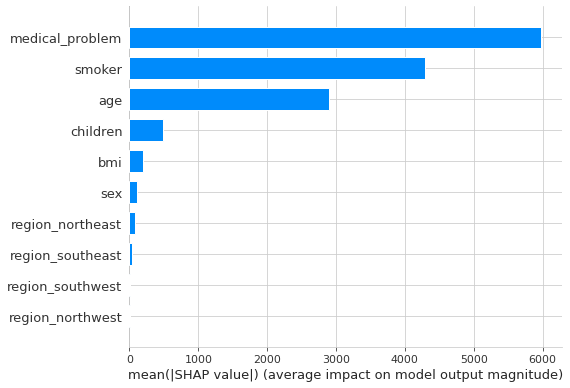

In [139]:
def plot_importance():
    
    sns.set_style(style="whitegrid")
    shap.summary_plot(shap_values, X_test_ohe, plot_type="bar")
    
    return plt.show()
if __name__ == "__main__":
    plot_importance()

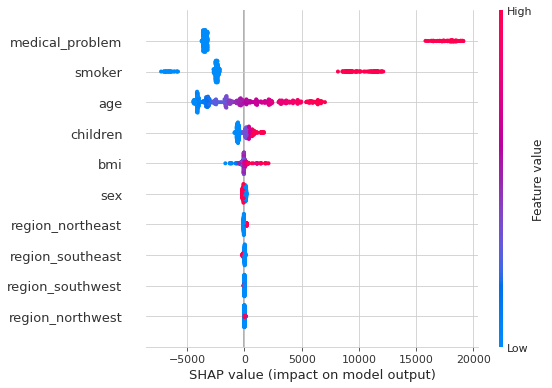

In [140]:
if __name__ == '__main__':
    
    shap.summary_plot(shap_values, X_test_ohe)

We note that the medical problem variable that we created in the Featurew Engineering section. It has great weight when estimating the price of the insurance, since if we have a very serious problem, the cost of the insurance will not increase more.

The smoker variable also has great weight, since people generally have a worse state of health.

The variable age adds value to the predictions. Since it can be understood that elderly people require more medical care.

The other variables may not have as much relevance compared to the previous variables that I mentioned earlier. But they can complement the value of the prediction. And that the difference between humans and machines when making predictions is that we rely on only relevant variables, while machines use these variables and also those that are not so significant, since they look for patterns unknown to the naked eye .

We make predictions

In [141]:
y_pred=xgb_reg.predict(X_test_ohe)
y_pred=y_pred.flatten()

In [142]:
df_test=pd.DataFrame({"y_true":Y_test,
                      "y_pred":y_pred,
                      "smoker":X_test["smoker"]})

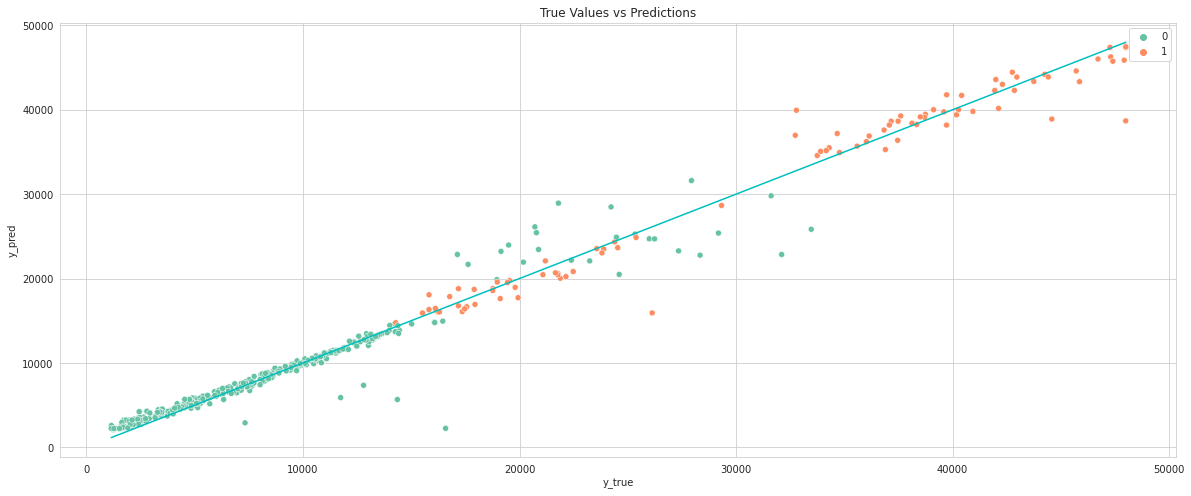

In [143]:
def main():
    
    fig,(ax)=plt.subplots(1,1,figsize=(20,8))
    
    ax.set_title("True Values vs Predictions")
    sns.scatterplot(data=df_test,x="y_true",y="y_pred",hue="smoker",palette="Set2")
    sns.lineplot(data=df_test,x="y_true",y="y_true",color="c")
if __name__ == "__main__":
    
    main()

The algorithm generates quite robust predictions, very close to the original value. Which this model is apt to solve the problem.

As a curious fact, XGBOOST is one of the most powerful algorithms within Machine Learning, it will generate interesting results in such a short time. He is the winner of multiple competitions on the kaggle platform. It has the advantage that we can use a GPU for training, speeding up the training process, something it shares with Deep Learning frameworks.

Save Model

We save the model in json format. Since its operation in production will be faster and more efficient.